In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path


/home/vt337/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
proj_dir = Path("Data/r77-mini-data-fortnight")
print(proj_dir.joinpath("input"))

data_dir = proj_dir
input_dir = data_dir.joinpath("input")
fixed_input_dir = input_dir.joinpath("fixed")
temporal_input_dir = input_dir.joinpath("temporal")
target_dir = data_dir.joinpath("target")
fixed_target_dir = target_dir.joinpath("fixed")
temporal_target_dir = target_dir.joinpath("temporal")

Data/r77-mini-data-fortnight/input


In [3]:
files = list(temporal_target_dir.iterdir())

index_dir = Path("Index")
files_index = list(index_dir.iterdir())
indices = np.load(files_index[0]).squeeze()

#First hour of data
index = indices[0]
tt = np.load(files[index]).squeeze()
tt.shape

(144, 70, 100, 3)

In [4]:
transposed_tt = np.transpose(tt, (0, 2, 3, 1))

reshaped_tt = transposed_tt.reshape(-1, 3, 70)

reshaped_tt.shape

(14400, 3, 70)

In [5]:
tt1 = reshaped_tt[:,:2,:64]
tt1.shape

(14400, 2, 64)

In [6]:
tt_temp = reshaped_tt[:,2,:]
tt_temp.shape

(14400, 70)

Text(0.5, 1.0, 'Interpolated Temperature')

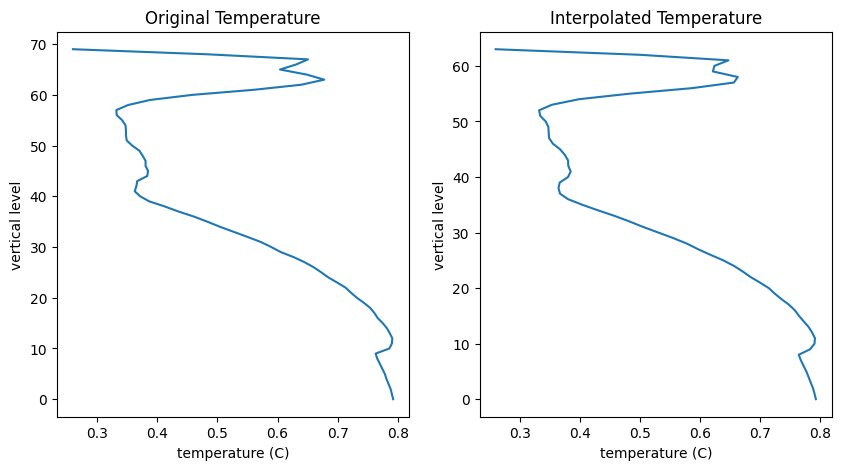

In [7]:
interpolated_temp = np.interp(np.linspace(0,1,64), np.linspace(0,1,70), tt_temp[0])
interpolated_temp

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

#Sample temperature plot
axs[0].plot(tt_temp[0], np.arange(70))
axs[0].set_xlabel("temperature (C)")
axs[0].set_ylabel("vertical level")
axs[0].set_title("Original Temperature")

# Input temperature plot
axs[1].plot(interpolated_temp, np.arange(64))
axs[1].set_xlabel("temperature (C)")
axs[1].set_ylabel("vertical level")
axs[1].set_title("Interpolated Temperature")

In [8]:
tt2 = np.array([np.interp(np.linspace(0,1,64), np.linspace(0,1,70), i) for i in tt_temp])
tt2.shape

(14400, 64)

In [9]:
temp_target = np.hstack((tt1, tt2[:, np.newaxis, :]))
temp_target.shape

(14400, 3, 64)

In [10]:
th = int(round(40*64/70,0))

def has_inversion(temperature_profile, troposphere_height):
    gradient = np.gradient(temperature_profile[:troposphere_height])
    return np.any(np.array(gradient) > 0.0)

In [11]:
inversion = np.array([has_inversion(i, th) for i in tt2])

In [12]:
inversion[inversion == False].shape[0]

0

In [13]:
no_inversions = []
for i in range(360):
    #First hour of data
    index = indices[i]
    tt = np.load(files[index]).squeeze()
    transposed_tt = np.transpose(tt, (0, 2, 3, 1))
    reshaped_tt = transposed_tt.reshape(-1, 3, 70)
    tt1 = reshaped_tt[:,:2,:64]
    tt_temp = reshaped_tt[:,2,:]
    tt2 = np.array([np.interp(np.linspace(0,1,64), np.linspace(0,1,70), i) for i in tt_temp])
    temp_target = np.hstack((tt1, tt2[:, np.newaxis, :]))
    inversion = np.array([has_inversion(i, th) for i in tt2])
    no_inversions.append(inversion[inversion == False].shape[0])

    

In [14]:
no_inversions = np.array(no_inversions)
no_inversions

array([    0,     1,     0,     6,    36,    90,   109,    81,    64,
          60,    42,     9,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     5,   162,   339,   705,  1124,  1719,
        2423,  3150,  4014,  4682,  5200,  6154,  6911,  7905,  8915,
       10160, 10719, 10726, 10600, 10654, 10224,  9474,  8408,  7042,
        5351,  4156,  3512,  2727,  1958,  1359,  1030,   536,   129,
          37,     5,     3,   282,   777,  1287,  1628,  1907,  2402,
        2426,  3189,  3731,  3664,  3647,  4042,  4444,  4610,  4421,
        3912,  3004,  2426,  2083,  1981,  1945,  1883,  1774,  1771,
        1756,  1741,  1544,  1321,  1163,   885,   528,   509,   449,
         315,   144,   118,   159,   216,   136,   204,   463,   817,
        1353,  1753,  2168,  2685,  3164,  3651,  4051,  4495,  4530,
        4392,  4501,  4457,  4496,  4115,  3818,  2784,  2488,  2227,
        1437,  1022,  1017,   625,   735,   276,    18,     2,   107,
         688,  1935,

In [15]:
np.argmin(np.abs(no_inversions - 7200))

np.int64(242)

In [16]:
no_inversions = []
for i in range(360):
    #First hour of data
    index = indices[i]
    tt = np.load(files[index]).squeeze()
    transposed_tt = np.transpose(tt, (0, 2, 3, 1))[:,:,:,:64]
    reshaped_tt = transposed_tt.reshape(-1, 3, 64)
    inversion = np.array([has_inversion(i, 40) for i in reshaped_tt[:,2,:]])
    no_inversions.append(inversion[inversion == False].shape[0])

In [17]:
no_inversions = np.array(no_inversions)
no_inversions

array([    0,     0,     0,     1,    17,    61,    83,    64,    48,
          48,    29,     8,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     5,   162,   335,   686,  1099,  1671,
        2378,  3171,  3977,  4538,  5012,  5893,  6633,  7558,  8547,
        9799, 10366, 10342, 10088, 10215,  9983,  9300,  8405,  7681,
        6238,  4858,  3813,  3120,  2313,  1806,  1255,   701,   250,
          83,    78,   412,   990,  1659,  2157,  2390,  2594,  2889,
        2694,  2938,  3135,  3096,  3263,  3572,  4040,  4297,  4067,
        3643,  2853,  2279,  1930,  1817,  1727,  1691,  1599,  1681,
        1704,  1678,  1482,  1260,  1102,   831,   449,   445,   370,
         253,   114,    90,   144,   191,   130,   187,   437,   763,
        1226,  1642,  2072,  2523,  2993,  3367,  3686,  4062,  4096,
        3946,  4055,  4029,  3991,  3713,  3491,  2460,  2020,  1932,
        1216,  1032,  1612,  1348,   975,   614,   441,   125,   368,
        1004,  1978,

In [23]:

reshaped_data = no_inversions.reshape(15, 24)
summed_inv = reshaped_data.sum(axis=0)

In [27]:
summed_inv/345600

array([0.11511863, 0.10738137, 0.10204282, 0.09820023, 0.0987066 ,
       0.09894676, 0.09842882, 0.09918113, 0.11036748, 0.12731771,
       0.14944734, 0.17158854, 0.18780671, 0.19657118, 0.19982639,
       0.20175347, 0.20090856, 0.19211516, 0.18050926, 0.17739005,
       0.1701794 , 0.15623843, 0.14562211, 0.14631944])

<BarContainer object of 24 artists>

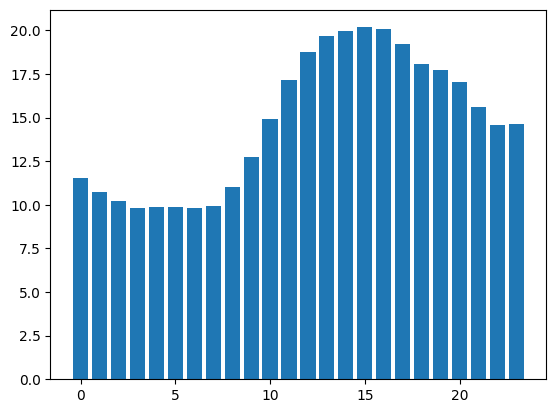

In [30]:
plt.bar(np.arange(24), summed_inv/345600*100)